# Trigonometric fit using hyperopt

https://github.com/fmfn/BayesianOptimization<br>
https://github.com/hyperopt/hyperopt

In [2]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt 
from sklearn.metrics import mean_squared_error, r2_score
from hyperopt import hp, tpe, Trials, fmin
import time

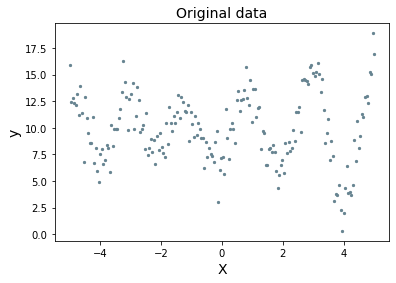

In [17]:
seed = 12345512
np.random.seed(seed)

n = 200
x_data = np.linspace(-5, 5, num=n)
# offset, amp1, omega1, phase1, amp2, omega2, phase2
o = [10, 3, 2.7, 1, 5, 3.0, -1.5]
y_data = o[0] + o[1] * np.sin(o[2] * x_data + o[3]) + o[4] * np.sin(o[5] * x_data + o[6]) + 1.5 * np.random.normal(size=n)

plt.scatter(x_data, y_data, label='observations', color='#678491', s= 5)
plt.ylabel('y', fontsize=14)
plt.xlabel('X', fontsize=14)
plt.title('Original data', fontsize=14);

In [18]:
# random split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)


In [19]:
def objective(a0, a1, f1, a2, f2):
    """Objective function to minimize"""
    w1, w2 = o[2], o[5]
    return np.mean((a0+ a1 * np.sin(w1*X_train + f1) + a2 * np.sin(w2*X_train + f2) - y_train)**2)

def objective2(args):
    return objective(*args)

## hyperopt

In [20]:
from hyperopt import hp, tpe, Trials, fmin
from IPython.display import display, Math

space = [hp.uniform('a0', 5, 15),
         hp.uniform('a1', 0, 10), 
         hp.uniform('f1', -np.pi, np.pi),
         hp.uniform('a2', 0, 10), 
         hp.uniform('f2', -np.pi, np.pi)]

tpe_algo = tpe.suggest
tpe_trials = Trials()

tpe_best = fmin(fn=objective2, space=space, algo=tpe_algo, trials=tpe_trials, max_evals=1000, rstate=np.random.default_rng(seed))
w1, w2 = o[2], o[5]

print('Prescribed frequency')
display(Math('\\omega_1={:.2f}, \\omega_2={:.2f}'.format(*[o[2], o[5]])))

print('Fitted parameters:')
display(Math('a_0={a0:.2f}, a_1={a1:.2f}, \\phi_1={f1:.2f}, a_2={a2:.2f}, , \\phi_2={f2:.2f}'.format(**tpe_best)))
print('Original parameters:')
display(Math('a_0={:.2f}, a_1={:.2f}, \\phi_1={:.2f}, a_2={:.2f}, \\phi_2={:.2f}'.format(*[o[0], o[1], o[3], o[4], o[6]])))

100%|████| 1000/1000 [00:09<00:00, 101.83trial/s, best loss: 2.1397276505885765]
Prescribed frequency


<IPython.core.display.Math object>

Fitted parameters:


<IPython.core.display.Math object>

Original parameters:


<IPython.core.display.Math object>

In [21]:
# Test
from sklearn.metrics import mean_squared_error, r2_score

ypred = tpe_best['a0']+ tpe_best['a1'] * np.sin(o[2] * X_test + tpe_best['f1']) +tpe_best['a2'] * np.sin(o[5] * X_test + tpe_best['f2'])

rmse = mean_squared_error(y_test,ypred)
r2 = r2_score(y_test,ypred)
print('mse:', rmse)
print('r2:',r2)

mse: 2.5302827770907763
r2: 0.755439178193748


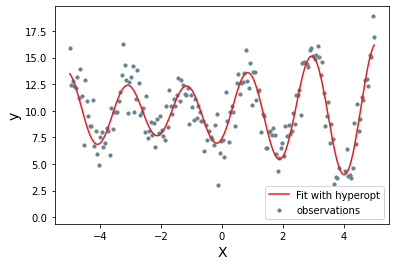

In [22]:
y = tpe_best['a0'] + tpe_best['a1'] * np.sin(w1* x_data + tpe_best['f1']) + tpe_best['a2'] * np.sin(w2 * x_data + tpe_best['f2'])

fig, ax = plt.subplots()
ax.scatter(x_data, y_data, label= 'observations', color= '#678491', s=10)
ax.plot(x_data, y, label= 'Fit with hyperopt', color='#EA1B1D')
ax.set_ylabel('y', fontsize= 14)
ax.set_xlabel('X', fontsize= 14)
plt.legend(loc='lower right')
#ax.set_title('Fit using hyperopt', fontsize= 14)
# plt.savefig('../images/hyperopt.png', bbox_inches="tight")